# Policy iteration for a very simple world!

In this code the optimal policy is found for:
for an agent finding the path to its destination.

*Dynamic programming* is used find the optimal values and policy with the notations in chapter 4 of THE book.
The book: Reinforcement learning (introduction) by Sutton & Batto, second edition.

# The code is structured as:
* 1. initialization
* 2. policy evaluation, just for fun of it!
* 3. policy iteration
* 4. printing and saving

In [3]:
from matplotlib import interactive
import matplotlib.pyplot as plt
import numpy as np
from plot_utils import create_plot, plotter
from RL_library import return_pointwise_A
from RL_library import Bellmann_iteration
from RL_library import Q_estimate
from RL_library import simulate

# 1. Initialization

* 1.1 initializing the random seed and the grid size along each direction

* 1.2 policy $\pi$: setting policy to a random policy

* 1.3 values, $v(s)$ setting all to zero

* 1.4 discount $\gamma$ which should be set to a value smaller than 1

* 1.5 setting up the plot


[[4 0 3 3 3 1 3 2 4 0]
 [0 4 2 1 0 1 1 0 1 4]
 [3 0 3 0 2 3 0 1 3 3]
 [3 0 1 1 1 0 2 4 3 3]
 [2 4 2 0 0 4 0 4 1 4]
 [1 2 2 0 1 1 1 1 3 3]
 [2 3 0 3 4 1 2 4 3 4]
 [4 4 3 4 4 4 0 4 3 2]
 [0 1 1 3 0 0 1 2 4 2]
 [0 3 2 2 0 1 0 2 2 3]]


/Users/akasper/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(0, 4 + 1) instead
  if __name__ == '__main__':


(0.0, 1.0, 0.0, 1.0)

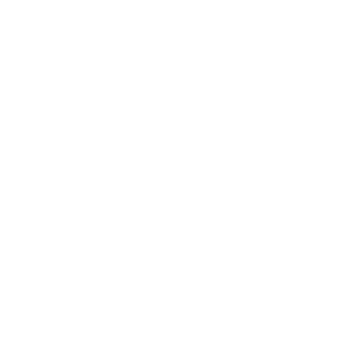

In [13]:
# 1.1 inputs and the random seed
np.random.seed(0)

# grid size along each direction
n = 10

# 1.2 policy $\pi$
# setting policy to a random policy
pi = np.random.random_integers(low=0, high=4, size=(n, n))
print(pi)

# 1.3 values, v
# setting all to zero
v = np.zeros(shape=(n, n))

# 1.4 discount
# should be set to a value smaller than 1
gamma = 0.99

# 1.5 setting up the plot
ax = create_plot(n)
plt.ion()
interactive(True)
plt.cla()
ax.axis('off')


# 2. policy evaluation #
Eq. (4.5) of the book.

At this point we can only evaluate the initial policy which is the random policy


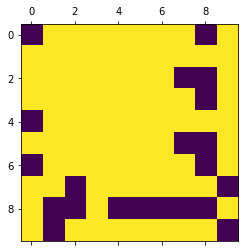

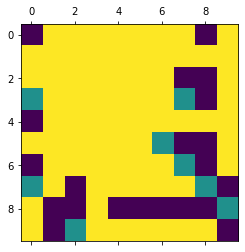

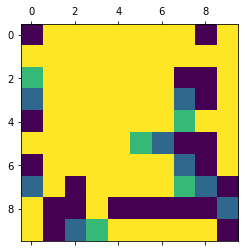

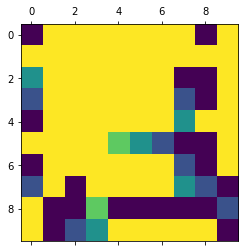

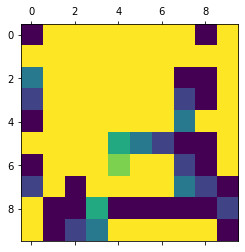

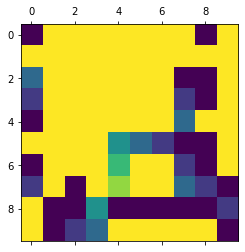

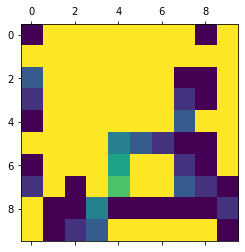

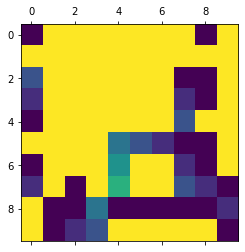

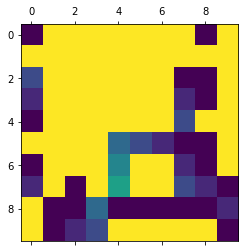

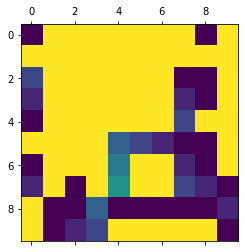

In [14]:
# 2. policy evaluation #
niteration = 10

for iteration in range(0, niteration):
    v = Bellmann_iteration(pi, v, gamma)
    plotter(ax, v)


# 3. policy iteration

* 3.1 setting the number of iterations for the policy improvement. This can be replaced by a measure of convergence
* 3.2 initializing values to zero.

* 3.3 the main iterative loop
 Eq. (4.7) of the book:
 each step is the Bellman operation for policy evaluation followed by a policy improvement


In [ ]:
# 3. policy iteration

# 3.1 number of iterations for the policy improvement
# this can be replaced by a measure of convergence
nr_iterations = 100

# 3.2 initializing values
# values are set to zero.
v = np.zeros(shape=(n, n))

# 3.3 the main iterative loop
# Eq. (4.7) of the book:
# each step is the Bellman operation for policy evaluation
# followed by a policy improvement
step = 0

while step < nr_iterations:
    new_pi = np.zeros(shape=(n, n))
    # policy evaluation
    v = Bellmann_iteration(pi, v, gamma)
    # policy improvement
    for i in range(0, n):
        for j in range(0, n):
            # Exercise
            # iterate over all at point A[i, j] to find the best action, i.e. the largest Q(s, a)
            # to this end you can use the following functions:
            # return_pointwise_A and
            # Q_estimate
            # when you found the best action, set the new policy (new_pi) to that action
    pi = new_pi + 0.0
    plotter(ax, v)
    step += 1

    if (step % 100 == 1):
        print("#iteration: " + str(step - 1))


simulate(4, 5, pi)
simulate(4, 5, pi, color='gray', nr_actions=5, randomize=1)


# 4. printing and saving

In [ ]:
plt.imshow(v)
plt.show()
np.savetxt('optimal_pi.dat', pi)